In [26]:
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
genres_path = "/Users/zzyun/Documents/GitHub/csc369/individualanalysis/genres.csv"
movies_path = "/Users/zzyun/Documents/GitHub/csc369/individualanalysis/movies.csv"
themes_path = "/Users/zzyun/Documents/GitHub/csc369/individualanalysis/themes.csv"

In [3]:
conn = duckdb.connect(database=':memory:')

In [4]:
conn.execute(f"CREATE TABLE genres_df AS SELECT * FROM read_csv('{genres_path}');")
conn.execute(f"CREATE TABLE movies_df AS SELECT * FROM read_csv('{movies_path}');")
conn.execute(f"CREATE TABLE themes_df AS SELECT * FROM read_csv('{themes_path}');")

In [5]:
conn.execute(f"""CREATE TABLE genres_themes_movies AS SELECT movies_df.*, genres_df.*, themes_df.* 
              FROM movies_df 
              INNER JOIN genres_df ON (movies_df.id = genres_df.id)
              INNER JOIN themes_df ON (movies_df.id = themes_df.id);""")

In [6]:
genres_themes_movies_df = conn.execute("""SELECT * FROM genres_themes_movies""").fetch_df()

Average movie length across genre:

In [7]:
average_time_by_genre = conn.execute("""
    SELECT genre, AVG(minute) AS av_length
    FROM genres_themes_movies
    GROUP BY genre
    ORDER BY av_length DESC
""").fetch_df()
average_time_by_genre

,genre,av_length
0,Documentary,139.985373
1,Animation,137.094978
2,Drama,136.707177
3,Mystery,129.467063
4,History,127.255975
5,Crime,126.171165
6,War,121.035244
7,Western,116.801036
8,Comedy,114.640663
9,Music,109.111851


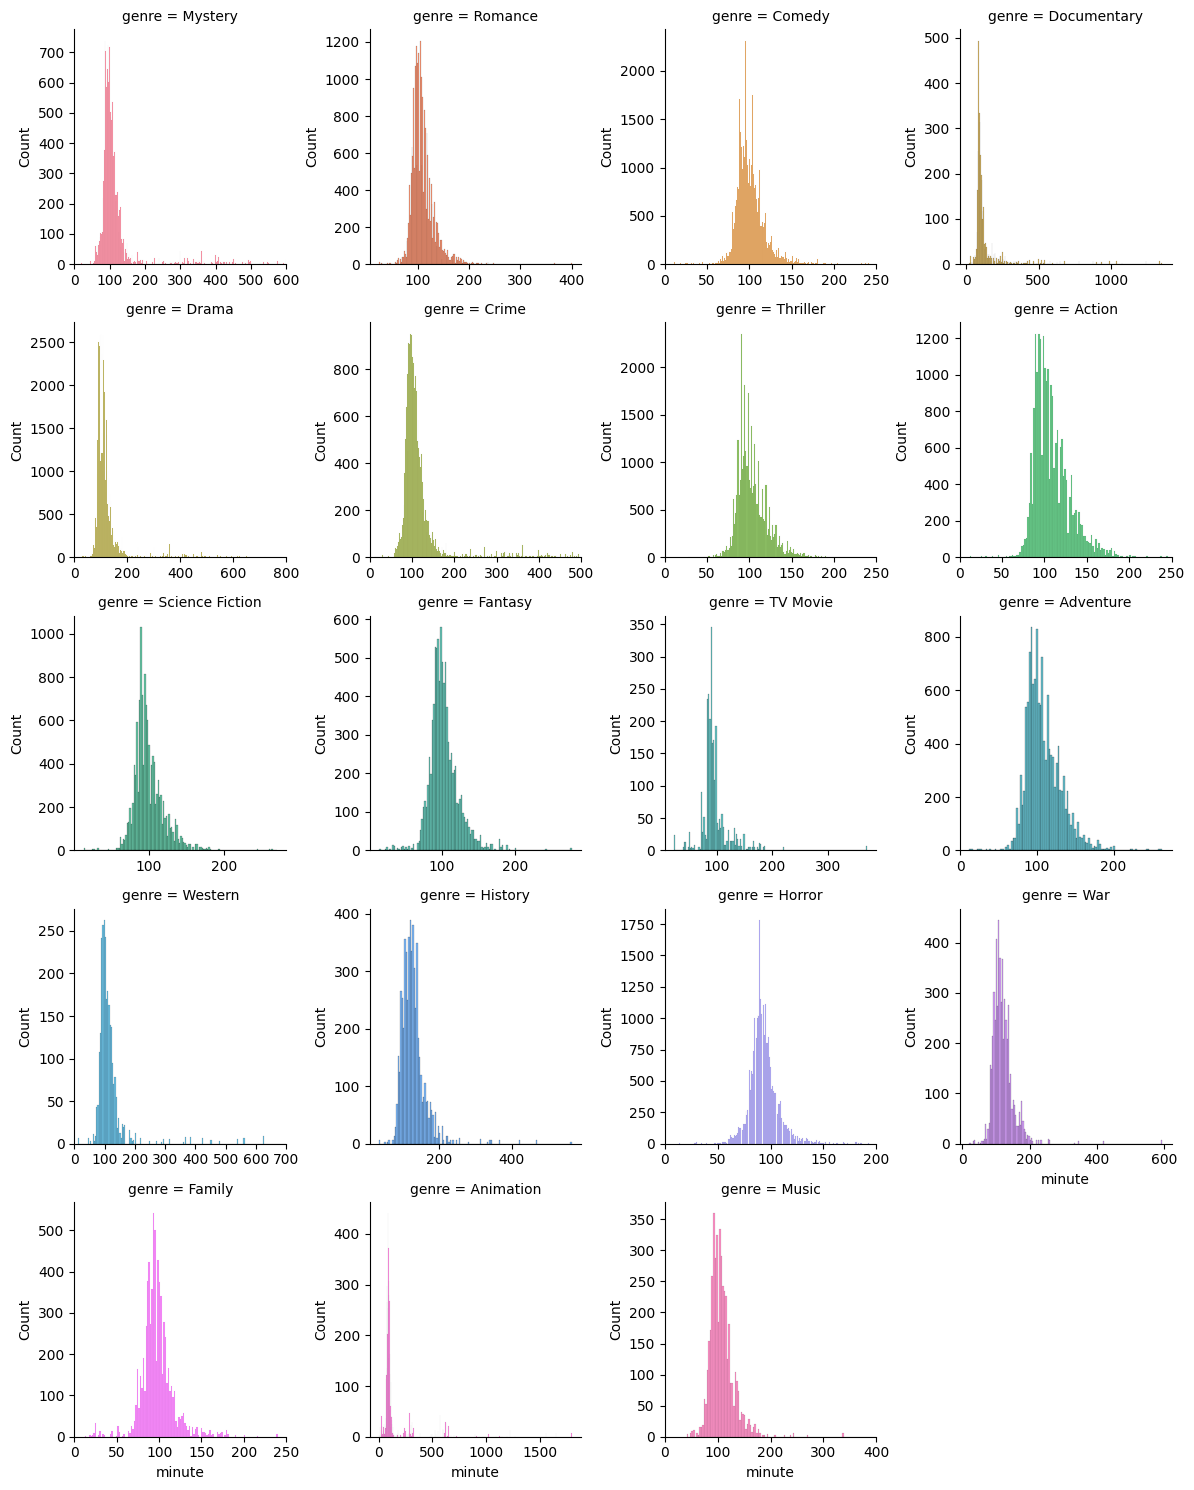

In [8]:
graph = sns.FacetGrid(genres_themes_movies_df, col="genre", col_wrap=4, sharex=False, sharey=False, hue="genre")
graph.map_dataframe(sns.histplot, x="minute")
for genre, ax in graph.axes_dict.items():
    if genre == "Drama":
        ax.set_xlim(0, 800)
        ax.set_xticks([0, 200, 400, 600, 800])
    elif genre == "Thriller":
        ax.set_xlim(0, 250)
        ax.set_xticks([0, 50, 100, 150, 200, 250])
    elif genre == "Crime":
        ax.set_xlim(0, 500)
        ax.set_xticks([0, 100, 200, 300, 400, 500])
    elif genre == "Comedy":
        ax.set_xlim(0, 250)
        ax.set_xticks([0, 50, 100, 150, 200, 250])
    elif genre == "Mystery":
        ax.set_xlim(0, 600)
        ax.set_xticks([0, 100, 200, 300, 400, 500, 600])
    elif genre == "Action":
        ax.set_xlim(0, 250)
        ax.set_xticks([0, 50, 100, 150, 200, 250])
    elif genre == "Western":
        ax.set_xlim(0, 700)
        ax.set_xticks([0, 100, 200, 300, 400, 500, 600, 700])
    elif genre == "Horror":
        ax.set_xlim(0, 200)
        ax.set_xticks([0, 50, 100, 150, 200])
    elif genre == "Family":
        ax.set_xlim(0, 250)
        ax.set_xticks([0, 50, 100, 150, 200, 250])
    elif genre == "Music":
        ax.set_xlim(0, 400)
        ax.set_xticks([0, 100, 200, 300, 400])

plt.show()

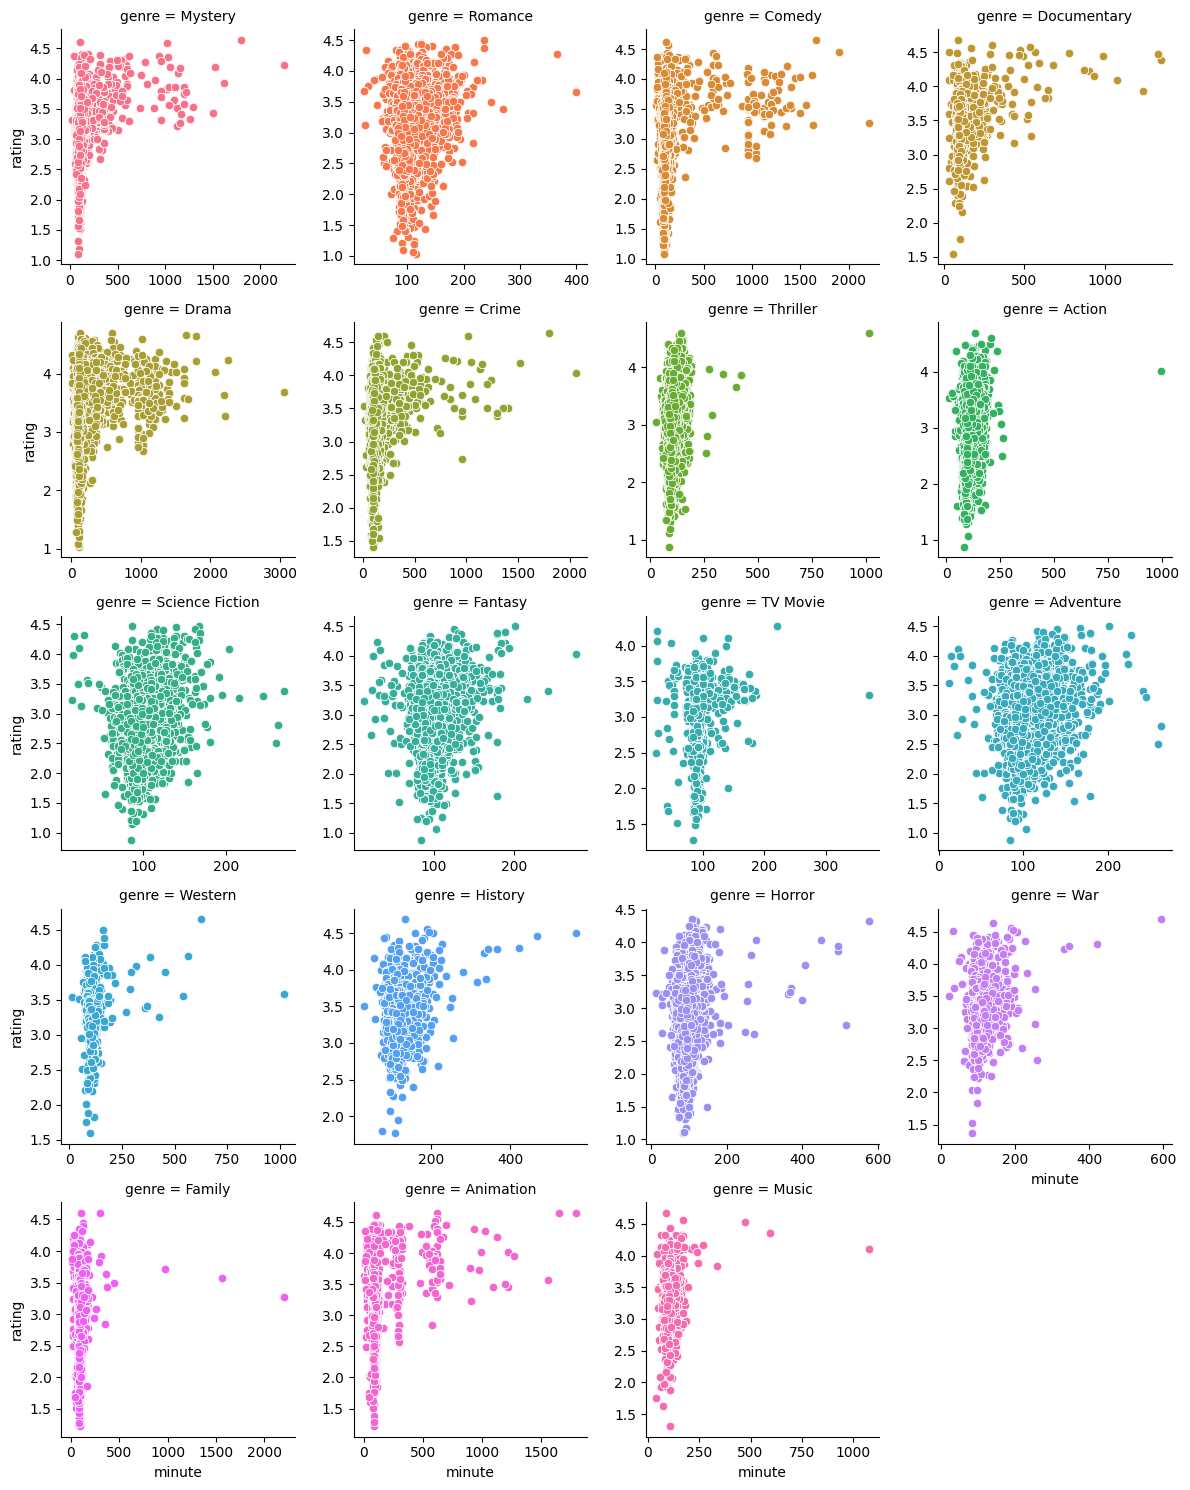

In [9]:
g = sns.FacetGrid(genres_themes_movies_df, col="genre", col_wrap=4, sharex=False, sharey=False, hue="genre")
g.map_dataframe(sns.scatterplot, x="minute", y="rating")
# for genre, ax in g.axes_dict.items():
#     if genre == "Drama":
#         ax.set_xlim(0, 800)
#         ax.set_xticks([0, 200, 400, 600, 800])
#     elif genre == "Thriller":
#         ax.set_xlim(0, 250)
#         ax.set_xticks([0, 50, 100, 150, 200, 250])
#     elif genre == "Crime":
#         ax.set_xlim(0, 500)
#         ax.set_xticks([0, 100, 200, 300, 400, 500])
#     elif genre == "Comedy":
#         ax.set_xlim(0, 250)
#         ax.set_xticks([0, 50, 100, 150, 200, 250])
#     elif genre == "Mystery":
#         ax.set_xlim(0, 600)
#         ax.set_xticks([0, 100, 200, 300, 400, 500, 600])
#     elif genre == "Action":
#         ax.set_xlim(0, 250)
#         ax.set_xticks([0, 50, 100, 150, 200, 250])
#     elif genre == "Western":
#         ax.set_xlim(0, 700)
#         ax.set_xticks([0, 100, 200, 300, 400, 500, 600, 700])
#     elif genre == "Horror":
#         ax.set_xlim(0, 200)
#         ax.set_xticks([0, 50, 100, 150, 200])
#     elif genre == "Family":
#         ax.set_xlim(0, 250)
#         ax.set_xticks([0, 50, 100, 150, 200, 250])
#     elif genre == "Music":
#         ax.set_xlim(0, 400)
#         ax.set_xticks([0, 100, 200, 300, 400])
plt.show()

In [10]:
countries_path = "/Users/zzyun/Documents/GitHub/csc369/individualanalysis/countries.csv"
conn.execute(f"CREATE TABLE countries_df AS SELECT * FROM read_csv('{countries_path}');")
languages_path = "/Users/zzyun/Documents/GitHub/csc369/individualanalysis/languages.csv"
conn.execute(f"CREATE TABLE languages_df AS SELECT * FROM read_csv('{languages_path}');")

In [11]:
conn.execute("""
    CREATE TABLE genres_themes_movies_countries_languages AS SELECT genres_themes_movies.*, countries_df.*, languages_df.* 
    FROM genres_themes_movies
    INNER JOIN countries_df ON (genres_themes_movies.id = countries_df.id)
    INNER JOIN languages_df ON (genres_themes_movies.id = languages_df.id);
""")

In [21]:
genres_themes_movies_countries_languages = conn.execute("""SELECT * FROM genres_themes_movies_countries_languages""").fetch_df()

In [22]:
num_ratings_by_country = conn.execute("""
    SELECT country, COUNT(rating) AS num_ratings
    FROM genres_themes_movies_countries_languages
    GROUP BY country
""").fetch_df()
num_ratings_by_country

,country,num_ratings
0,Hong Kong,13505
1,Finland,2148
2,Chile,496
3,Jordan,179
4,Israel,1831
...,...,...
143,Albania,110
144,Armenia,0
145,Belarus,120
146,Turks and Caicos Islands,18


In [50]:
av_ratings_by_country = conn.execute("""
    SELECT country, AVG(rating) AS av_ratings
    FROM genres_themes_movies_countries_languages
    WHERE country IN('USA', 'UK', 'Australia')
    GROUP BY country
    ORDER BY av_ratings DESC
""").fetch_df()
av_ratings_by_country

,country,av_ratings
0,UK,3.233308
1,Australia,3.120936
2,USA,3.100420


/var/folders/h7/37_cj9516nxdqf_tfy89b3nw0000gn/T/ipykernel_2727/3620054533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(num_ratings_by_country, x="country", y="num_ratings", palette="viridis")


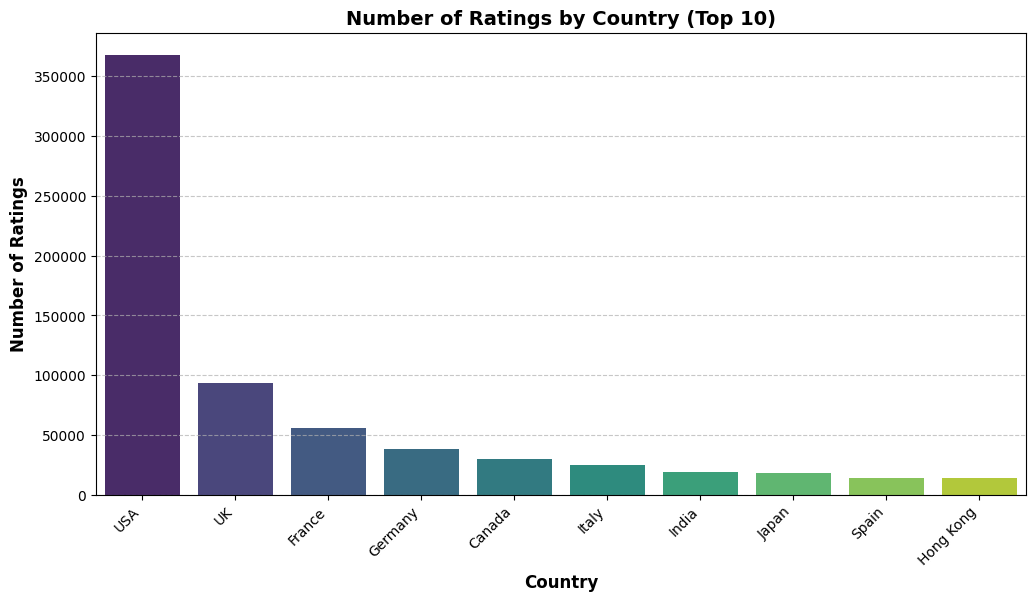

In [23]:
num_ratings_by_country = num_ratings_by_country.sort_values(by="num_ratings", ascending=False).nlargest(10, "num_ratings")

plt.figure(figsize=(12, 6))

sns.barplot(num_ratings_by_country, x="country", y="num_ratings", palette="viridis")

plt.xticks(rotation=45, ha="right", fontsize=10) 
plt.yticks(fontsize=10) 
plt.xlabel("Country", fontsize=12, fontweight="bold") 
plt.ylabel("Number of Ratings", fontsize=12, fontweight="bold") 
plt.title("Number of Ratings by Country (Top 10)", fontsize=14, fontweight="bold") 

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [55]:
duration_over_250 = conn.execute("""
    SELECT * FROM genres_themes_movies_countries_languages WHERE minute > 250
""").fetch_df()

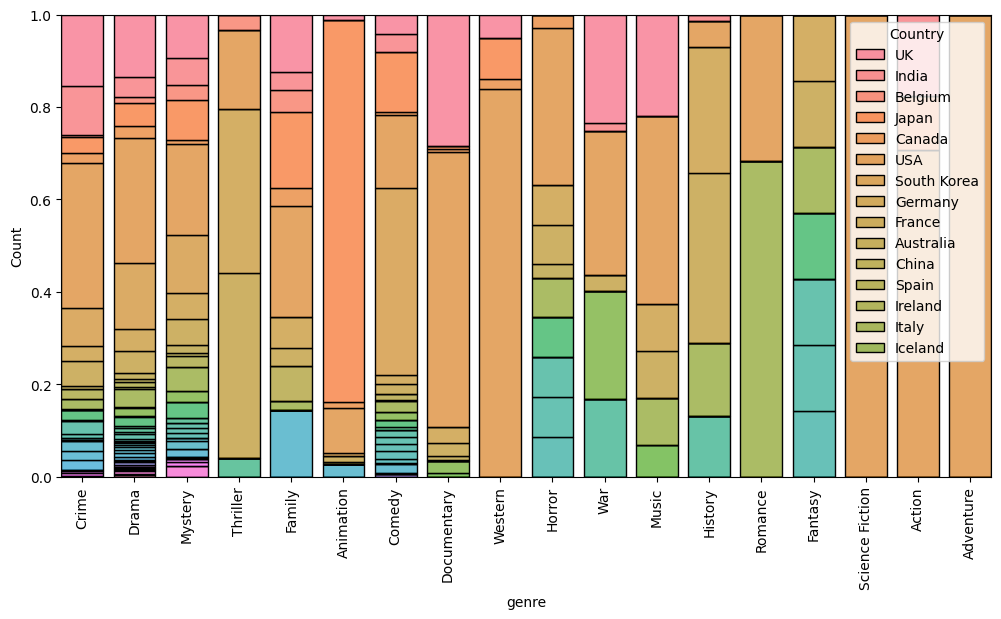

In [58]:
plt.figure(figsize=(12, 6)) 
ax = sns.histplot(data=duration_over_250, x="genre", hue="country", multiple="fill", shrink=0.8)

plt.xticks(rotation=90) 

handles, labels = ax.get_legend().legend_handles, [t.get_text() for t in ax.get_legend().get_texts()]
ax.legend(handles[:15], labels[:15], title="Country", loc="upper right")

threshold = 0.05 

for container in ax.containers:
    for bar in container:
        if bar.get_height() > threshold: 
            ax.annotate(f"{bar.get_height():.2f}",  
                        (bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2), 
                        ha='center', va='center', fontsize=9, color='black', fontweight='bold')

plt.show()


